In [ ]:
import pandas as pd

# Load CSV
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

# Basic cleaning
df = df.drop_duplicates()
df = df[df['Quantity'] > 0]  # Remove returns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Description'] = df['Description'].str.upper()
df['CustomerID'] = df['CustomerID'].fillna(0).astype(int)


In [ ]:
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [ ]:
# Check unique types
print(df['InvoiceNo'].unique()[:10])  # likely strings like 'A563185'
print(df['CustomerID'].unique()[:10]) # may have NaN or numbers



# Keep InvoiceNo as string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Clean CustomerID: convert to int safely
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce').fillna(0).astype(int)

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Uppercase description
df['Description'] = df['Description'].str.upper()


['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
[17850 13047 12583 13748 15100 15291 14688 17809 15311 16098]


In [ ]:
import duckdb

# Create an in-memory DuckDB database
conn = duckdb.connect(database=':memory:')


In [ ]:
# Create table directly from the DataFrame
conn.execute("CREATE TABLE retail AS SELECT * FROM df")

# Verify the table
print(conn.execute("DESCRIBE retail").fetchall())


[('InvoiceNo', 'VARCHAR', 'YES', None, None, None), ('StockCode', 'VARCHAR', 'YES', None, None, None), ('Description', 'VARCHAR', 'YES', None, None, None), ('Quantity', 'BIGINT', 'YES', None, None, None), ('InvoiceDate', 'TIMESTAMP_NS', 'YES', None, None, None), ('UnitPrice', 'DOUBLE', 'YES', None, None, None), ('CustomerID', 'BIGINT', 'YES', None, None, None), ('Country', 'VARCHAR', 'YES', None, None, None)]


In [ ]:
total_transactions = conn.execute("SELECT COUNT(*) AS total_transactions FROM retail").fetchdf()
print(total_transactions)

   total_transactions
0              526054


In [ ]:
total_revenue = conn.execute("SELECT SUM(Quantity * UnitPrice) AS total_revenue FROM retail").fetchdf()
print(total_revenue)


   total_revenue
0   1.061999e+07


In [ ]:
avg_invoice_revenue = conn.execute("""
SELECT InvoiceNo, SUM(Quantity * UnitPrice) AS invoice_revenue
FROM retail
GROUP BY InvoiceNo
""").fetchdf()
print(avg_invoice_revenue.head())


  InvoiceNo  invoice_revenue
0    547088           304.90
1    547090           203.40
2    547093           300.52
3    547094           922.10
4    547095           332.60


In [ ]:
countries = conn.execute("SELECT DISTINCT Country FROM retail").fetchdf()
print(countries)


                 Country
0                 France
1                Germany
2                 Norway
3                   EIRE
4                 Poland
5               Portugal
6                  Italy
7                Denmark
8                 Sweden
9                Finland
10             Hong Kong
11             Singapore
12          Saudi Arabia
13                Canada
14                 Malta
15                   USA
16                Brazil
17                   RSA
18        United Kingdom
19             Australia
20           Netherlands
21           Switzerland
22                 Spain
23               Belgium
24             Lithuania
25                 Japan
26               Iceland
27       Channel Islands
28                Cyprus
29               Austria
30               Bahrain
31                Israel
32                Greece
33               Lebanon
34  United Arab Emirates
35        Czech Republic
36           Unspecified
37    European Community


In [ ]:
#Top 10 Products by Revenue

top_products = conn.execute("""
SELECT Description, SUM(Quantity * UnitPrice) AS revenue
FROM retail
GROUP BY Description
ORDER BY revenue DESC
LIMIT 10
""").fetchdf()

print(top_products)


                          Description    revenue
0                      DOTCOM POSTAGE  206248.77
1            REGENCY CAKESTAND 3 TIER  174156.54
2         PAPER CRAFT , LITTLE BIRDIE  168469.60
3  WHITE HANGING HEART T-LIGHT HOLDER  106236.72
4                       PARTY BUNTING   99445.23
5             JUMBO BAG RED RETROSPOT   94159.81
6      MEDIUM CERAMIC TOP STORAGE JAR   81700.92
7                             POSTAGE   78101.88
8                              MANUAL   77752.82
9                  RABBIT NIGHT LIGHT   66870.03


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-3428806988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='Description', x='revenue', palette='viridis')


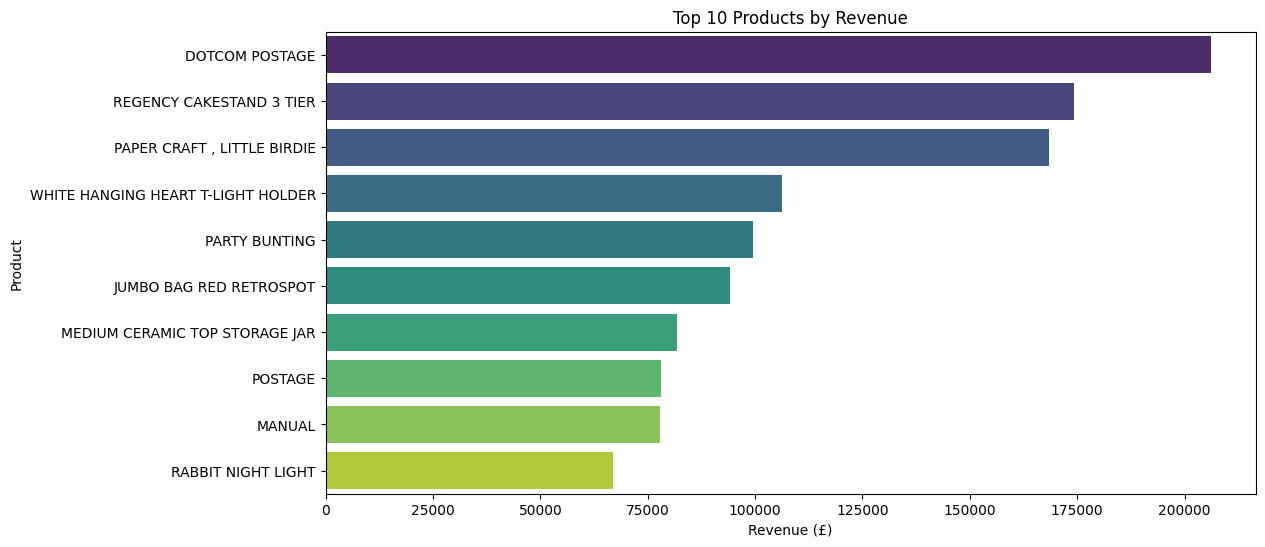

In [ ]:
# --- Top 10 Products by Revenue ---
plt.figure(figsize=(12,6))
sns.barplot(data=top_products, y='Description', x='revenue', palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('Product')
plt.show()

In [ ]:
#Monthly Revenue Trend

monthly_revenue = conn.execute("""
SELECT strftime('%Y-%m', InvoiceDate) AS month, SUM(Quantity * UnitPrice) AS revenue
FROM retail
GROUP BY month
ORDER BY month
""").fetchdf()

print(monthly_revenue.head())

     month     revenue
0  2010-12  821452.730
1  2011-01  689811.610
2  2011-02  522545.560
3  2011-03  716215.260
4  2011-04  536968.491


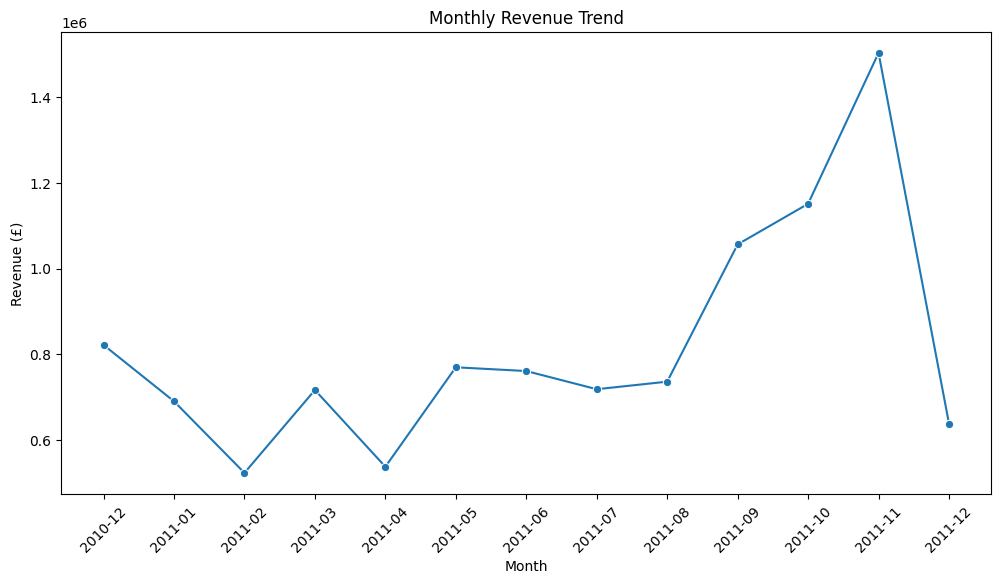

In [ ]:
# --- Monthly Revenue Trend ---
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='month', y='revenue', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue (£)')
plt.show()

In [ ]:
customer_ranking = conn.execute("""
SELECT CustomerID, SUM(Quantity * UnitPrice) AS total_revenue,
       RANK() OVER (ORDER BY SUM(Quantity * UnitPrice) DESC) AS revenue_rank
FROM retail
GROUP BY CustomerID
ORDER BY revenue_rank
""").fetchdf()

print(customer_ranking.head(10))


   CustomerID  total_revenue  revenue_rank
0           0     1732777.79             1
1       14646      280206.02             2
2       18102      259657.30             3
3       17450      194390.79             4
4       16446      168472.50             5
5       14911      143711.17             6
6       12415      124914.53             7
7       14156      117210.08             8
8       17511       91062.38             9
9       16029       80850.84            10


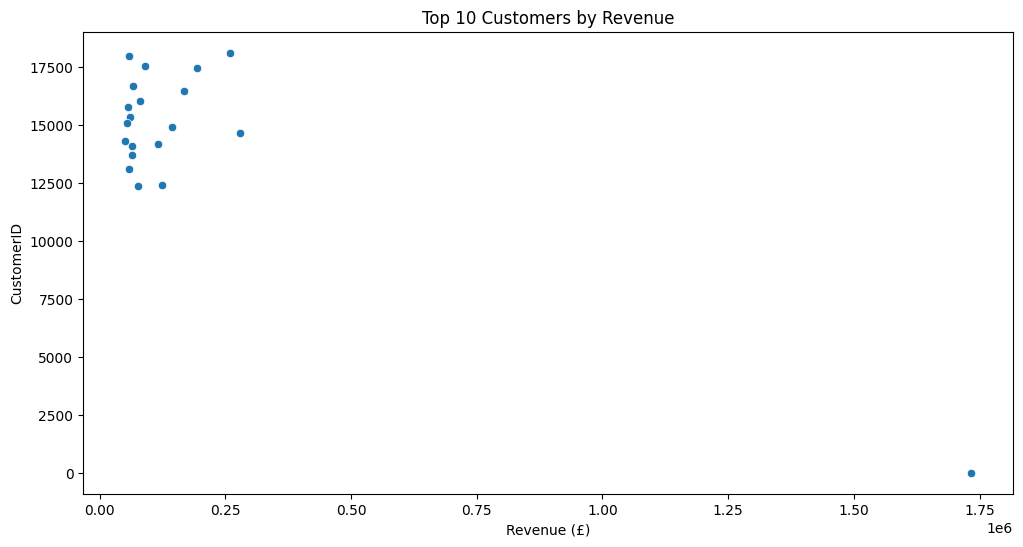

In [ ]:
# --- Top 10 Customers by Revenue ---
top_customers = customer_ranking.head(20)
plt.figure(figsize=(12,6))
sns.scatterplot(data=top_customers, x='total_revenue', y='CustomerID', marker = 'o')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Revenue (£)')
plt.ylabel('CustomerID')
plt.show()

/tmp/ipython-input-2496035760.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_revenue, y='Country', x='revenue', palette='coolwarm')


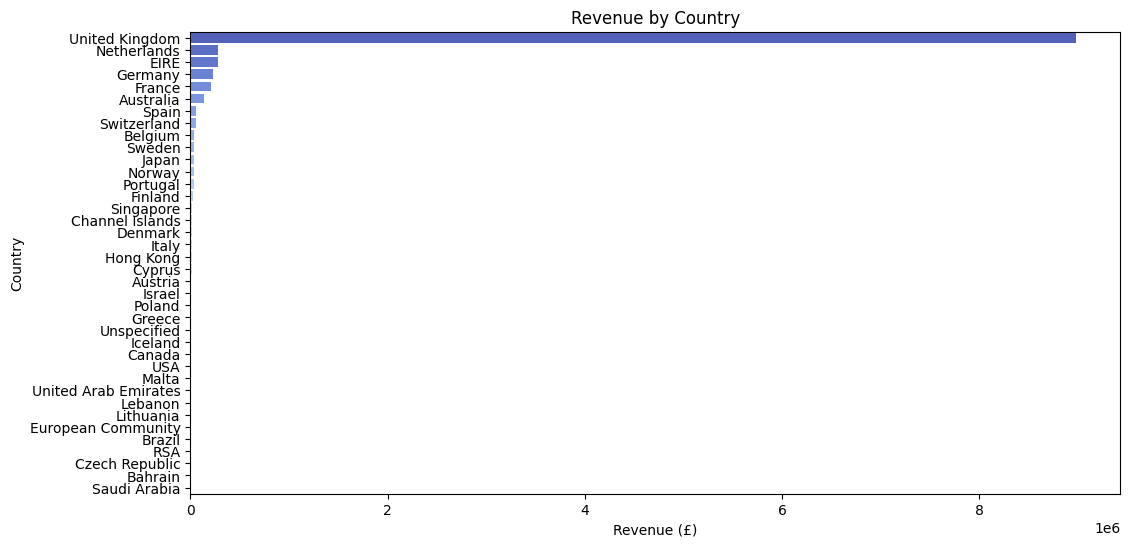

In [ ]:
#Revenue by Country

country_revenue = conn.execute("""
SELECT Country, SUM(Quantity * UnitPrice) AS revenue
FROM retail
GROUP BY Country
ORDER BY revenue DESC
""").fetchdf()

plt.figure(figsize=(12,6))
sns.barplot(data=country_revenue, y='Country', x='revenue', palette='coolwarm')
plt.title('Revenue by Country')
plt.xlabel('Revenue (£)')
plt.ylabel('Country')
plt.show()


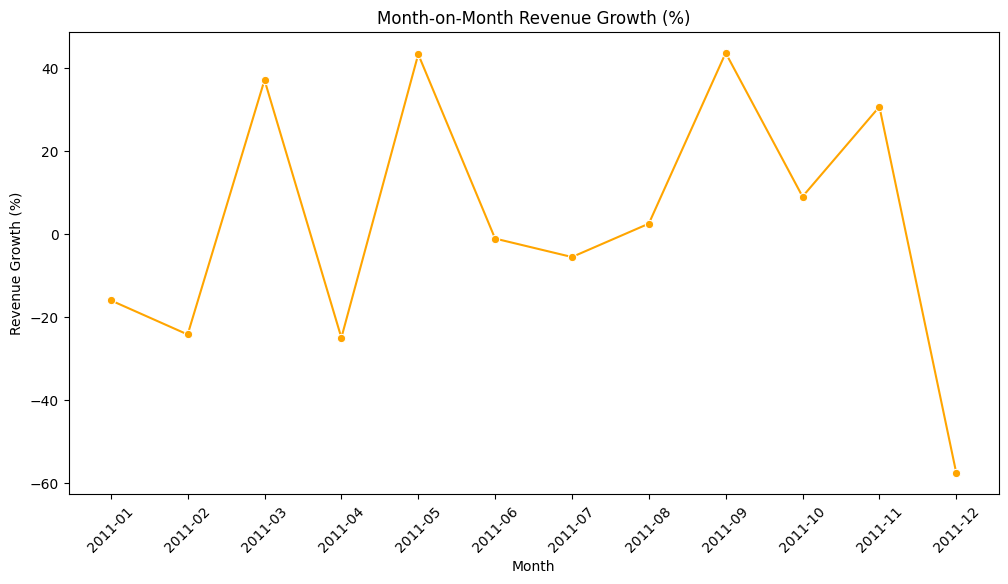

In [ ]:
#MOM growth

monthly_revenue['revenue_mom_growth'] = monthly_revenue['revenue'].pct_change() * 100

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='month', y='revenue_mom_growth', marker='o', color='orange')
plt.xticks(rotation=45)
plt.title('Month-on-Month Revenue Growth (%)')
plt.xlabel('Month')
plt.ylabel('Revenue Growth (%)')
plt.show()
